# TEST pycoQC package
** This notebook contains tests for all functions contained in pycoQC package **

## Imports

In [29]:
from pprint import pprint as pp

# Jupyter specific imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Pyplot/matplotlib imports and option
from matplotlib import pyplot as pl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pl.rcParams['figure.figsize'] = 20, 7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']

# Pandas imports and option
import pandas as pd
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 50

# Import pycoQC main class
from pycoQC import pycoQC

# Import functions from pycoQC_fun
from pycoQC_fun import jprint as print
from pycoQC_fun import jhelp as help
from pycoQC_fun import is_readable_file, sequencing_summary_file_sample

In [49]:
print(pl.style.available)

## Load example files

In [14]:
file_df = pycoQC.example_data_files()
display(file_df)

example_file_1D_DNA_1 = file_df.loc["1D_DNA_1.2.1"]["path"]
example_file_1D_RNA_2 = file_df.loc["1D_RNA_2.0.1"]["path"]
example_file_1D2_DNA_1 = file_df.loc["1D2_DNA_1.2.1"]["path"]

path  \
1D_DNA_1.2.1    /home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt   
1D_RNA_2.0.1    /home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt   
1D2_DNA_1.2.1  /home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt   

                                                                                   description  
1D_DNA_1.2.1    Sequencing summary file generated by a 1D_DNA run basecalled by Albacore 1.2.1  
1D_RNA_2.0.1    Sequencing summary file generated by a 1D_RNA run basecalled by Albacore 2.0.1  
1D2_DNA_1.2.1  Sequencing summary file generated by a 1D2_DNA run basecalled by Albacore 1.2.1

# pycoQC_fun

### sequencing_summary_file_sample

In [45]:
help(sequencing_summary_file_sample, full=True)

Sample a number read lines in infile and write the output_over_time in output_file

If the file contains several runids the function will sample proportionally to the

* infile: STR

Path to a sequencing_summary input file

* outfile: STR (default None)

Path to a sequencing_summary output file. If not given, will return a dataframe instead

* n_seq: STR (default 10000)

Overall number of sequence lines to sample

In [14]:
df = sequencing_summary_file_sample("./data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", n_seq=100)

50000 sequences
ad3de3b63de71c4c6d5ea4470a82782cf51210d9 = 49603 seq, to sample = 99
7082b6727942b3939a023beaf03ef24cec1722e5 = 397 seq, to sample = 1


# pycoQC

## pycoQC __init__

In [15]:
help(pycoQC.__init__, full=True)

Parse Albacore sequencing_summary.txt file and clean-up the data

* seq_summary_file: STR

Path to the sequencing_summary generated by Albacore 1.0.0 +

* run_type: STR [Default None]

Force to us the Type of the run 1D or 1D2

* runid_list: LIST of STR [Default []]

Select only specific runids to be analysed. Can also be used to force pycoQC to order the runids for

temporal plots, if the sequencing_summary file contain several sucessive runs. By default pycoQC analyses

all the runids in the file and uses the runid order as defined in the file.

* filter_zero_len: BOOL [Default False]

If True, zero length reads will be filtered out.

* filter_fail: BOOL [Default False]

If True, sequenced flagged as fail will be filtered out of all subsequent analysis

(only compatible with albacore 2.0+)

* filter_calibration: BOOL [Default False]

If True, sequenced flagged as aligned on the calibration will be filtered out of all subsequent analysis

(only compatible with albacore 2.0+)

### Base instantiation

In [14]:
p = pycoQC(example_file_1D_RNA_2, verbose=True)

In [15]:
p = pycoQC(example_file_1D2_DNA_1, verbose=True)

In [16]:
p = pycoQC(example_file_1D_DNA_1, verbose=True)

### Advanced Instantiation

In [30]:
runid_list = ["3a0ea63a73db0f9fb611b9da3a37045d249a9be0", "e7d9b3c6bb26250ffaf1f8be9d2d1ae0105204b9", "135e6b0c7d4223d4047216f10bede4ca5a84eb28"]
p = pycoQC(example_file_1D_RNA_2, runid_list=runid_list, verbose=True)

In [31]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True ,verbose=True)

In [32]:
p = pycoQC(example_file_1D2_DNA_1, filter_fail=True ,verbose=True)

In [33]:
p = pycoQC(example_file_1D_RNA_2, filter_fail=True ,verbose=True)

In [34]:
p = pycoQC(example_file_1D_RNA_2, filter_calibration=True ,verbose=True)

## overview

In [35]:
help(pycoQC.overview, full=True)

Generate a quick overview of the data (tables + plots)

* plot_style: STR [default "ggplot"]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

* cmap [Default "Set3"]

Matplotlib colormap code to color the space (https://matplotlib.org/users/colormaps.html)

=> Return

A tuple (fig, axe) for each plots for further user customisation (http://matplotlib.org/api/axes_api.html)

Count
Reads             4.009600e+04
Bases             5.290519e+06
Events            7.078918e+07
Active Channels   5.050000e+02
Run Duration (h)  3.155290e+01

reads
2f4d52a34ec56518aa0d051dc4484c2b454abc6a  16845
f6d788dc15a52f5bbb736aa82c5dee7b9c50d63f   9527
aa23fdac499ddcbe80b86a240ee2e803f39d62ea   7113
135e6b0c7d4223d4047216f10bede4ca5a84eb28   4525
a175388e5c1ed0e6a78791f120de1c9efcb46b43    802
3a0ea63a73db0f9fb611b9da3a37045d249a9be0    515
e7d9b3c6bb26250ffaf1f8be9d2d1ae0105204b9    233
7e95428dd57055c0665696cce1bffc73fd5b5d29    207
b4013533403ec7bbe89d2e9e4021d06c69fe6cf5    175
5db3f3d44b7ce2c468a7d786060fe39e59282240    154

Quality score distribution  Read length distribution
count                40096.000000              40096.000000
mean                     5.477253                131.946304
std                      1.315528                347.405268
min                      1.000000                  5.000000
10%                      3.754000                 50.000000
25%                      4.602750                 77.000000
50%                      5.540000                111.000000
75%                      6.380000                148.000000
90%                      7.080000                191.000000
max                     11.530000              25837.000000

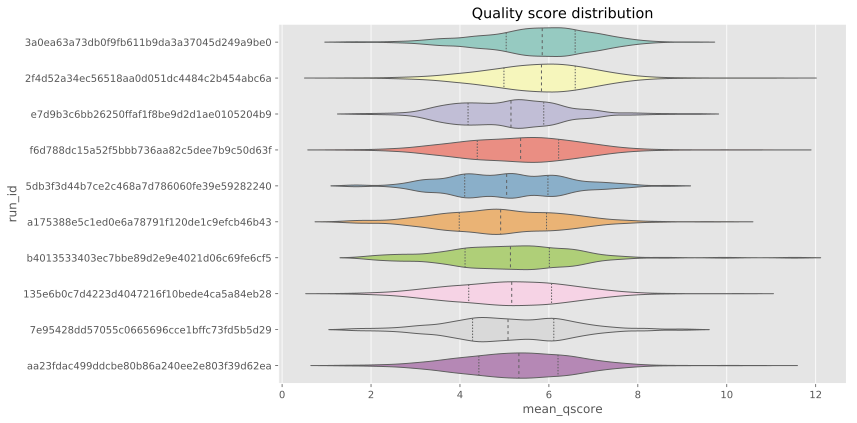

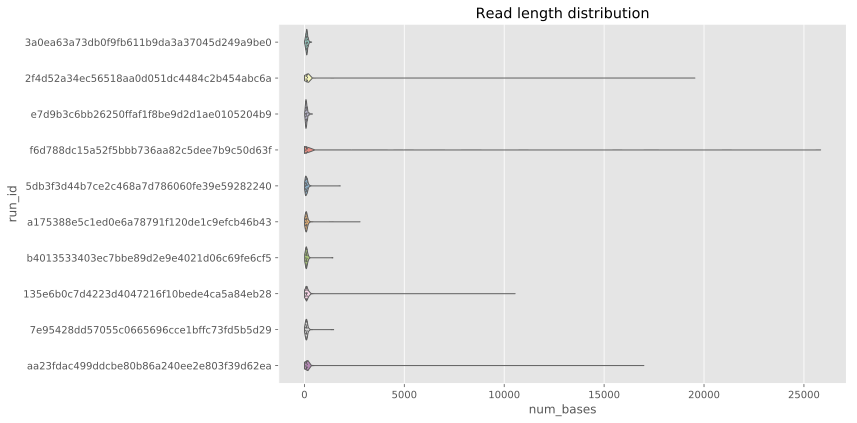

In [36]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True)
(fig1, ax1), (fig2, ax2) = p.overview()

Count
Reads             5.000000e+04
Bases             4.598551e+08
Events            8.422545e+08
Active Channels   5.070000e+02
Run Duration (h)  4.779043e+01

reads
ad3de3b63de71c4c6d5ea4470a82782cf51210d9  49603
7082b6727942b3939a023beaf03ef24cec1722e5    397

Quality score distribution  Read length distribution
count                50000.000000              50000.000000
mean                    11.018961               9197.102300
std                      2.093471              12475.543239
min                      2.784000                  5.000000
10%                      7.720000                744.000000
25%                      9.546000               2067.000000
50%                     11.552000               3516.000000
75%                     12.692000              10581.250000
90%                     13.316000              28132.200000
max                     15.255000              49902.000000

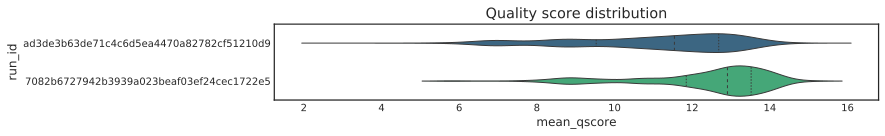

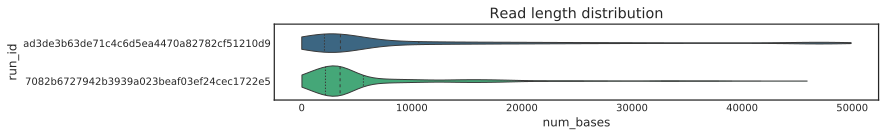

In [37]:
p = pycoQC(example_file_1D_DNA_1, filter_zero_len=True)
(fig1, ax1), (fig2, ax2) = p.overview (cmap="viridis", plot_style="seaborn-white")

## reads_len_bins

In [38]:
help(pycoQC.reads_len_bins, full=True)

Count the number of reads per interval of sequence length and return a dataframe

* bins: LIST [Default [-1,0,25,50,100,500,1000,5000,10000,100000,10000000]]

Limits of the intervals as a list

In [39]:
p = pycoQC(example_file_1D_DNA_1, filter_zero_len=True)
p.reads_len_bins()

Count
Sequence lenght ranges       
(-1, 0]                     0
(0, 25]                    77
(25, 50]                   65
(50, 100]                 152
(100, 500]               2172
(500, 1000]              4705
(1000, 5000]            25188
(5000, 10000]            4705
(10000, 100000]         12936
(100000, 10000000]          0

In [40]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True)
p.reads_len_bins(bins=[0,50,100,500,1000,10000,1000000])

Count
Sequence lenght ranges       
(0, 50]                   157
(50, 100]                  75
(100, 500]               2718
(500, 1000]              2994
(1000, 10000]            3743
(10000, 1000000]          288

In [41]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True, filter_fail=True)
p.reads_len_bins(bins=[0,25,50,75,100,125,150,175,200,250,300,400,500,1000,10000])

Count
Sequence lenght ranges       
(0, 25]                     2
(25, 50]                   92
(50, 75]                  148
(75, 100]                 127
(100, 125]                259
(125, 150]                614
(150, 175]                859
(175, 200]                797
(200, 250]                928
(250, 300]                375
(300, 400]                147
(400, 500]                 20
(500, 1000]                32
(1000, 10000]             138

## reads_qual_bins

In [18]:
help(pycoQC.reads_qual_bins, full=True)

Count the number of reads per interval of sequence quality and return a dataframe

* bins: LIST [Default [-1,0,2,4,6,8,10,12,14,16,18,20,40]]

Limits of the intervals as a list

In [40]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True)
p.reads_qual_bins()

Count
Sequence quality ranges       
(-1, 0]                      0
(0, 2]                     229
(2, 4]                    5231
(4, 6]                   20228
(6, 8]                   13636
(8, 10]                    671
(10, 12]                   101
(12, 14]                     0
(14, 16]                     0
(16, 18]                     0
(18, 20]                     0
(20, 40]                     0

In [41]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True, filter_fail=True)
p.reads_qual_bins()

Count
Sequence quality ranges       
(-1, 0]                      0
(0, 2]                       0
(2, 4]                       0
(4, 6]                       0
(6, 8]                    3766
(8, 10]                    671
(10, 12]                   101
(12, 14]                     0
(14, 16]                     0
(16, 18]                     0
(18, 20]                     0
(20, 40]                     0

In [43]:
p = pycoQC(example_file_1D_DNA_1)
p.reads_qual_bins([0,2,4,6,8,10,12,14,16,40])

Count
Sequence quality ranges       
(0, 2]                       0
(2, 4]                      17
(4, 6]                     356
(6, 8]                    5214
(8, 10]                   8678
(10, 12]                 15200
(12, 14]                 19852
(14, 16]                   683
(16, 40]                     0

## channels_activity

In [42]:
help(pycoQC.channels_activity, full=True)

Plot the activity of channels at read, base or event level. The layout does not represent the physical layout

of the flowcell based on seaborn heatmap funtion

* level: STR [Default "reads"]

Aggregate channel output results by "reads", "bases" or "events".

* figsize: LIST [Default [24,12]]

Size of ploting area

* cmap: STR [Default "OrRd"]

Matplotlib colormap code to color the space (https://matplotlib.org/users/colormaps.html)

* alpha [Default 1]

Opacity of the area from 0 to 1

* robust: BOOL [Default True]

if True the colormap range is computed with robust quantiles instead of the extreme values

* annot: BOOL [Default True]

If True, write the data value in each cell.

* fmt

String formatting code to use when adding annotations (see matplotlib documentation) [Default "d"]

* cbar

Whether to draw a colorbar scale on the right of the graph [Default False]

* plot_style: STR [default 'seaborn-white']

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

=> Return

A fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

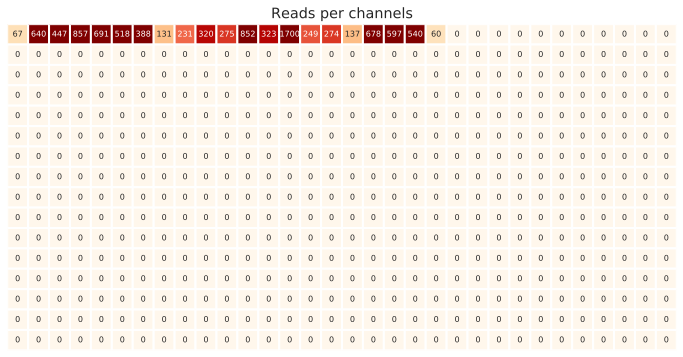

In [43]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True)
fig,ax = p.channels_activity(level='reads', figsize=[12,6])

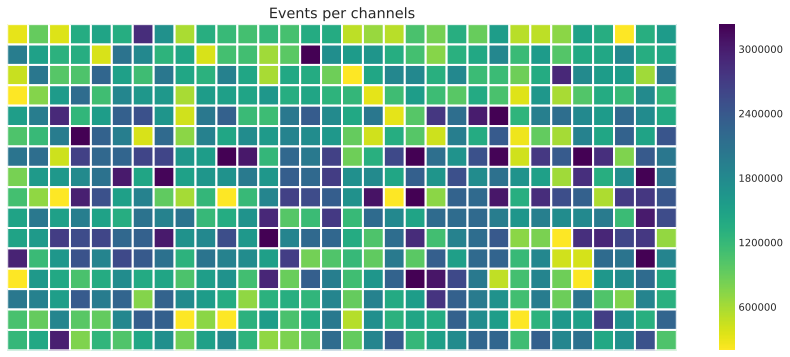

In [44]:
p = pycoQC(example_file_1D_DNA_1, filter_zero_len=True)

with pl.style.context('seaborn-white'):
    g = p.channels_activity(level='events', cmap="viridis_r", cbar=True, annot=False, figsize=[15,6])

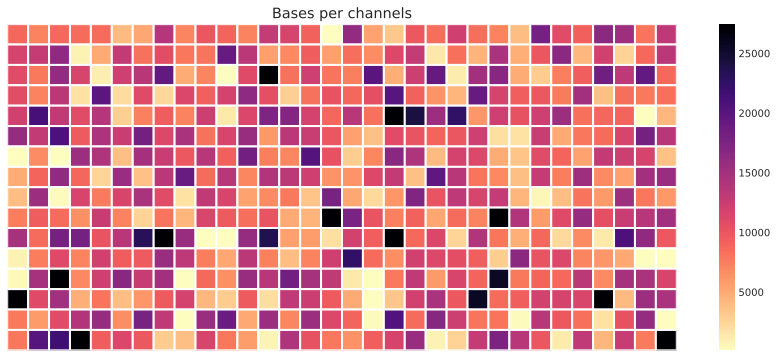

In [45]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True)
g = p.channels_activity(level='bases', cmap="magma_r", cbar=True, annot=False, figsize=[15,6])

## mean_qual_distribution

In [46]:
help(pycoQC.reads_qual_distribution, full=True)

Plot the distribution of mean read quality

* figsize: LIST [Default [30,7]]

Size of ploting area

* hist: BOOL [Default True]

If True plot an histogram of distribution

* kde: BOOL [Default True]

If True plot a univariate kernel density estimate

* kde_color / hist_color: STR [Default "black" "orangered"]

Color map or color codes to use for the 3 plots

See https://matplotlib.org/examples/color/named_colors.html

* kde_alpha / hist_alpha: FLOAT [Default 0.5 0.5]

Opacity of the area from 0 to 1 for the 3 plots

* win_size: FLOAT [Default 0.1]

Size of the bins in quality score ranging from 0 to 40 for the histogram

* sample: INT [Default 100000]

If given, a n number of reads will be randomly selected instead of the entire dataframe

* min_qual, max_qual: INT or None [Default None]

Minimal and maximal read quality cut-offs for the plot

* min_freq, max_freq: INT or None [Default None]

Minimal and maximal read frequency cut-offs for the plot

* plot_style: STR [default "ggplot"]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

=> Return

A fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

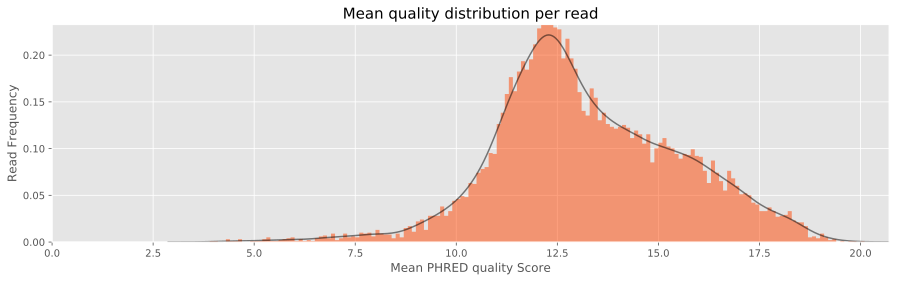

In [47]:
# Default option = histogram + kde
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True)
fig, ax = p.reads_qual_distribution(figsize=[15, 4])
_ = ax.title.set_fontsize(15)

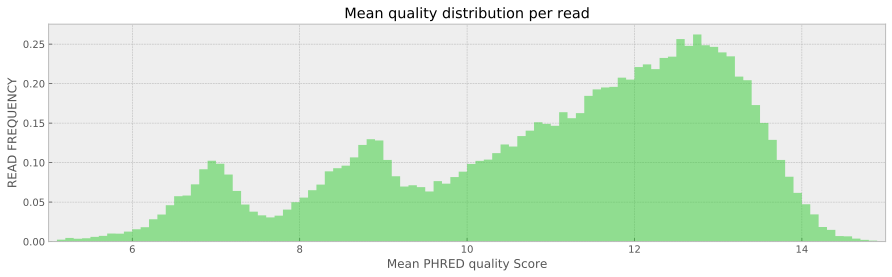

In [53]:
# histogram only
p = pycoQC(example_file_1D_DNA_1, filter_zero_len=True)
fig, ax = p.reads_qual_distribution(figsize=[15, 4], kde=False, hist_color="limegreen", max_qual=15, min_qual=5, plot_style="bmh")
_ = ax.set_ylabel("READ FREQUENCY")

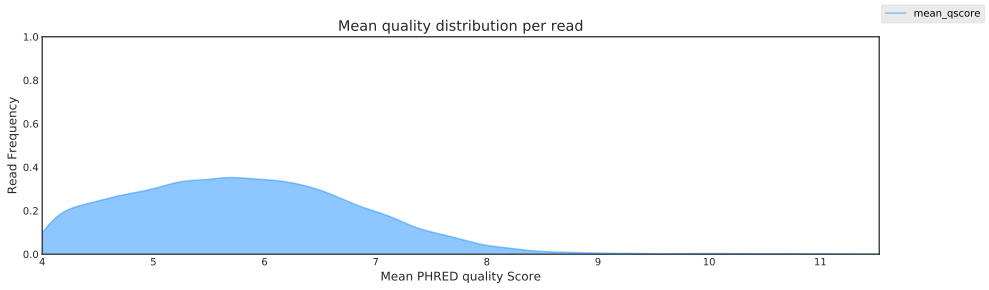

In [56]:
# kde only
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True)
fig, ax = p.reads_qual_distribution(figsize=[15, 4], hist=False, kde_color="dodgerblue", min_qual=4, max_freq=1, plot_style="seaborn-white")
_ = fig.legend()

## output_over_time

In [21]:
help(pycoQC.output_over_time, full=True)

Plot the output over the time of the experiment at read, base or event level

* level: STR [Default "reads"]

Aggregate channel output results by "reads", "bases" or "events"

* runid_lines: BOOL [Default True]

If True a vertical line will be plotted at the start position of each runid in the dataset

* figsize: LIST [Default [30,7]]

Size of ploting area

* color: STR [Default "orangered"]

Color of the plot. Valid matplotlib color code

See https://matplotlib.org/examples/color/named_colors.html

* alpha: FLOAT [Default 0.5]

Opacity of the area from 0 to 1

* win_size: FLOAT [Default 0.25]

Size of the bins in hours

* plot_style: STR [default "ggplot"]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

=> Return

A fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

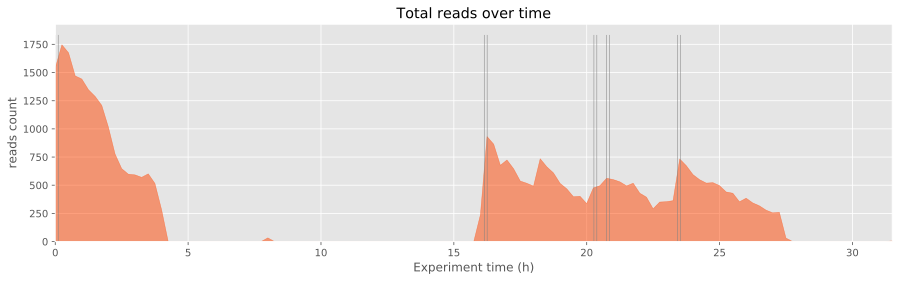

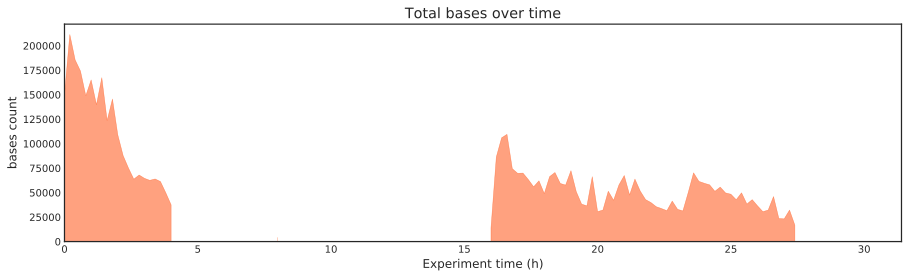

In [58]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True)
fig, ax = p.output_over_time(level='reads', figsize=[15, 4], runid_lines=True)
fig, ax = p.output_over_time(level='bases', figsize=[15, 4], win_size=0.2, runid_lines=False, plot_style="seaborn-white")

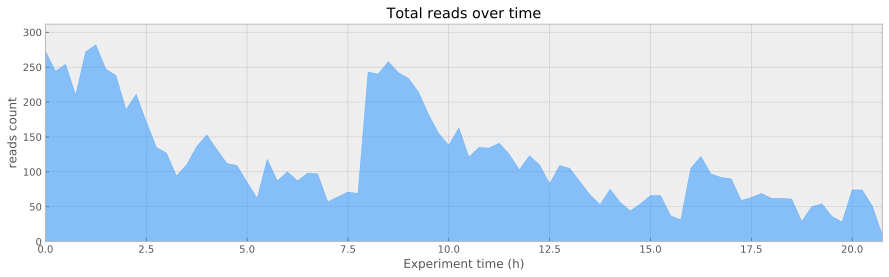

In [60]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True)
fig, ax = p.output_over_time(level='reads', figsize=[15, 4], color='dodgerblue', plot_style="bmh")
fig, ax = p.output_over_time(level='events', figsize=[15, 4], color='dodgerblue')

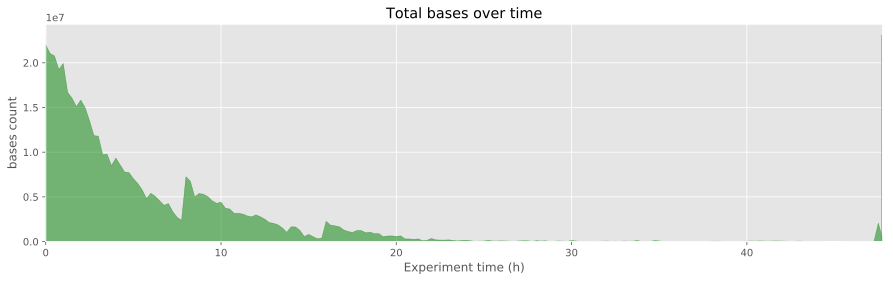

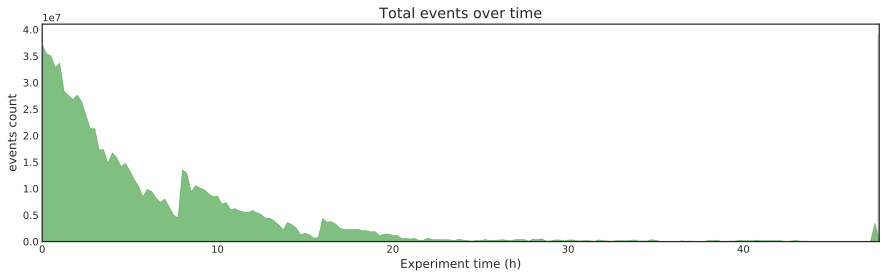

In [80]:
p = pycoQC(example_file_1D_DNA_1)
fig, ax = p.output_over_time(level='bases', figsize=[15, 4], color='green', plot_style='fast')
fig, ax = p.output_over_time(level='events', figsize=[15, 4], color='green', plot_style='seaborn-white')

## quality_over_time

In [22]:
help(pycoQC.quality_over_time, full=True)

Plot the evolution of the mean read quality over the time of the experiment

* runid_lines: BOOL [Default True]

If True a vertical line will be plotted at the start position of each runid in the dataset

* figsize: LIST [Default [30,7]]

Size of ploting area

* color: STR  [Default "orangered"]

Color of the plot. Valid matplotlib color code

See https://matplotlib.org/examples/color/named_colors.html

* alpha: FLOAT [Default 0.25]

Opacity of the area from 0 to 1

* win_size: FLOAT [Default 0.25]

Size of the bins in hours

* plot_style: STR [default "ggplot"]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

=> Return

A matplotlib fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

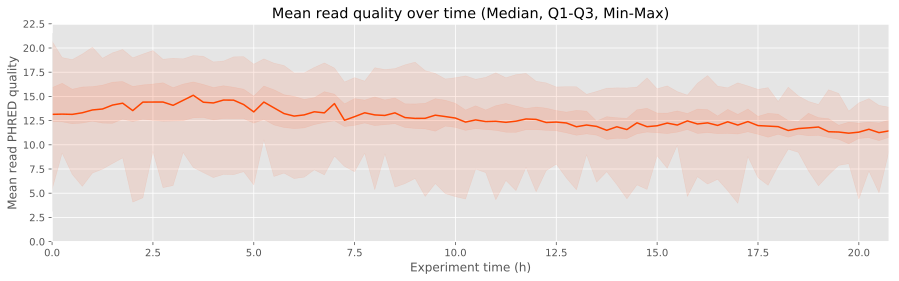

In [67]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True)
fig, ax = p.quality_over_time(figsize=[15,4], alpha=0.1)

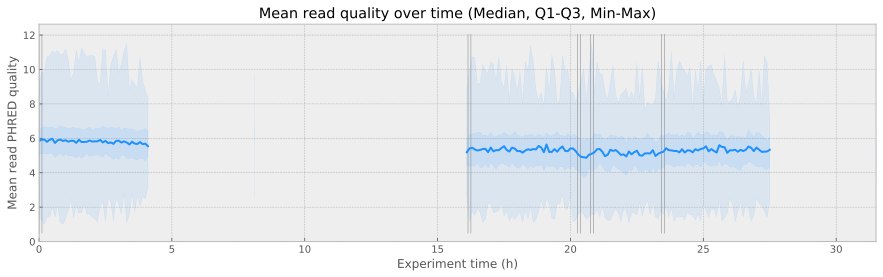

In [70]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True)
fig, ax = p.quality_over_time(figsize=[15,4], color='dodgerblue', alpha=0.1, win_size=0.1, plot_style="bmh")

## reads_len_distribution

In [71]:
help(pycoQC.reads_len_distribution, full=True)

Plot the distribution of read length in base pairs

* figsize: LIST [Default [30,7]]

Size of ploting area

* hist: BOOL [Default True]

If True plot an histogram of distribution

* kde: BOOL [Default True]

If True plot a univariate kernel density estimate

* kde_color / hist_color: STR [Default "black" "orangered"]

Color map or color codes to use for the 3 plots

See https://matplotlib.org/examples/color/named_colors.html

* kde_alpha / hist_alpha: FLOAT [Default 0.5 0.5]

Opacity of the area from 0 to 1 for the 3 plots

* win_size: INT [Default 250]

Size of the bins in base pairs for the histogram

* sample:INT [Default 100000]

If given, a n number of reads will be randomly selected instead of the entire dataframe

* min_len, max_len: INT or None [Default None]

Minimal and maximal read length cut-offs for the plot

* min_freq, max_freq: INT or None [Default None]

Minimal and maximal read frequency cut-offs for the plot

* plot_style: STR [default "ggplot"]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

=> Return

A fig + axes tuple for further user customisation (http://matplotlib.org/api/axes_api.html)

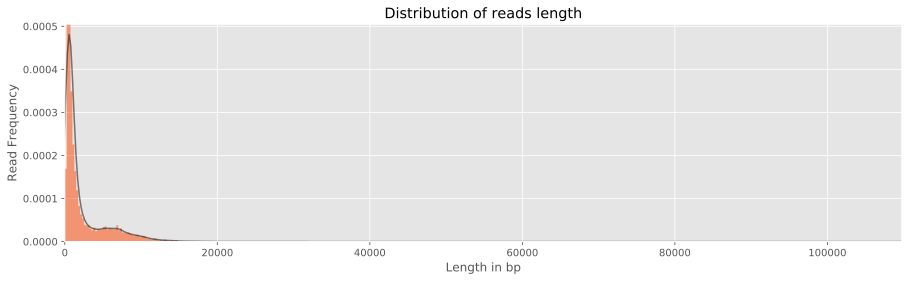

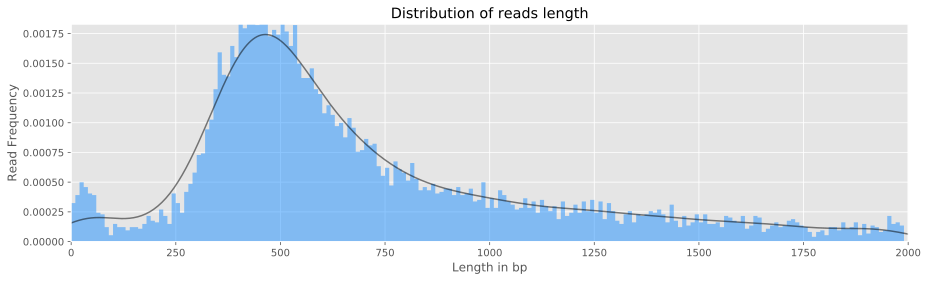

In [84]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True)
fig, ax = p.reads_len_distribution(figsize=[15,4])
fig, ax = p.reads_len_distribution(figsize=[15,4], hist=True, kde=True, hist_color='dodgerblue', hist_alpha=0.5, max_len=2000, win_size=10)

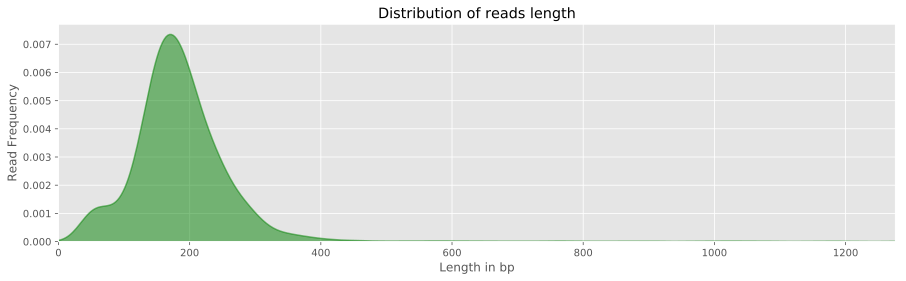

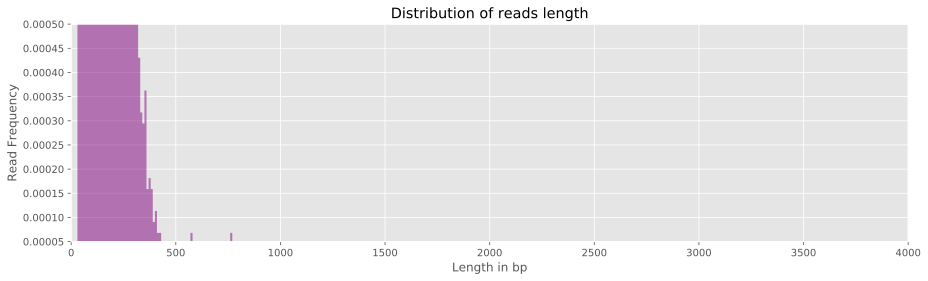

In [85]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True, filter_fail=True, filter_calibration=True)
fig, ax = p.reads_len_distribution(figsize=[15,4], hist=False, kde=True, kde_color='green', kde_alpha=0.5)
fig, ax = p.reads_len_distribution(figsize=[15,4], hist=True, kde=False, hist_color='purple', win_size=10, min_freq=0.00005, max_freq=0.0005, max_len=4000)

## reads_len_quality

In [24]:
help(pycoQC.reads_len_quality, full=True)

Draw a bivariate plot of read length vs mean read quality with marginal univariate plots.

* figsize: INT [Default 12]

Size of square ploting area

* kde: BOOL [Default True]

If True plot a bivariate kernel density estimate

* scatter: BOOL [Default True]

If True plot a scatter plot

* margin_plot: BOOL [Default True]

If True plot marginal univariate distributions

* kde_cmap / scatter_color / margin_plot_color: STR [Default "copper", "orangered", "orangered"]

Color map or color codes to use for the 3 plots

See https://matplotlib.org/users/colormaps.html, https://matplotlib.org/examples/color/named_colors.html

* kde_alpha / scatter_alpha / margin_plot_alpha: FLOAT [Default 1, 0.01, 0.5]

Opacity of the area from 0 to 1 for the 3 plots

* sample: INT [Default 100000]

If given, a n number of reads will be randomly selected instead of the entire dataframe

* kde_levels: INT  [Default 10]

Number of levels for the central density plot

* kde_shade: BOOL [Default False]

If True the density curves will be filled

* min_len, max_len: INT or None [Default None]

Minimal and maximal read length cut-offs for the plot

* min_qual, max_qual: INT or None [Default None]

Minimal and maximal read quality cut-offs for the plot

* plot_style: STR [default "ggplot"]

Matplotlib plotting style. See https://matplotlib.org/users/style_sheets.html

=> Return

A seaborn JointGrid object containing the plot (http://seaborn.pydata.org/generated/seaborn.JointGrid.html)

In [78]:
p = pycoQC(example_file_1D_DNA_1, filter_zero_len=True)

g = p.reads_len_quality(
    figsize=10,
    kde=True,
    kde_cmap="bone",
    kde_alpha=0.8,
    kde_levels=25,
    scatter=True,
    scatter_color='steelblue',
    margin_plot=True,
    margin_plot_color='steelblue',
    sample = 20000)

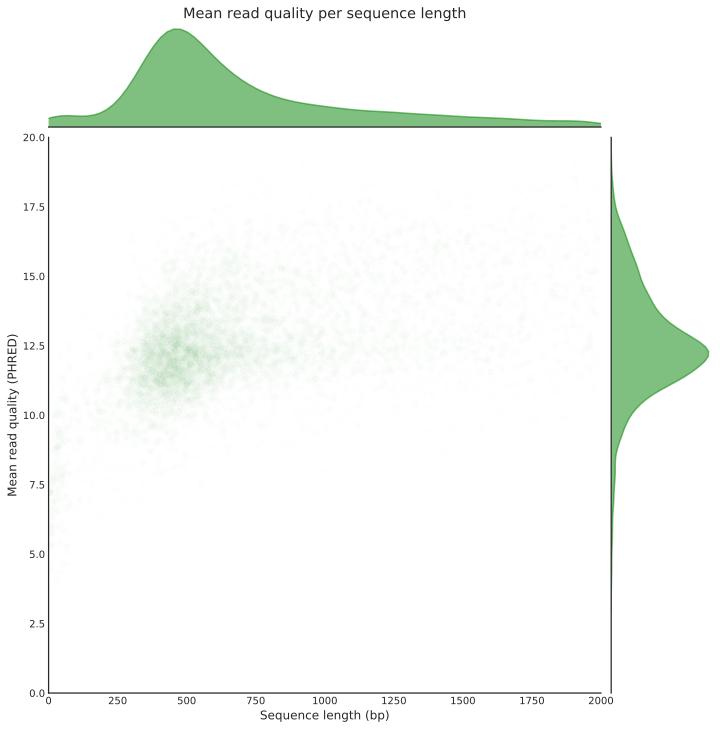

In [79]:
p = pycoQC(example_file_1D2_DNA_1, filter_zero_len=True)

g = p.reads_len_quality(
    figsize=10,
    scatter=True,
    kde=False,
    scatter_alpha=0.01,
    scatter_color="green",
    margin_plot=True,
    margin_plot_color='green',
    margin_plot_alpha=0.5,
    min_len=0,
    max_len=2000,
    min_qual=0,
    max_qual=20,
    plot_style="seaborn-white")

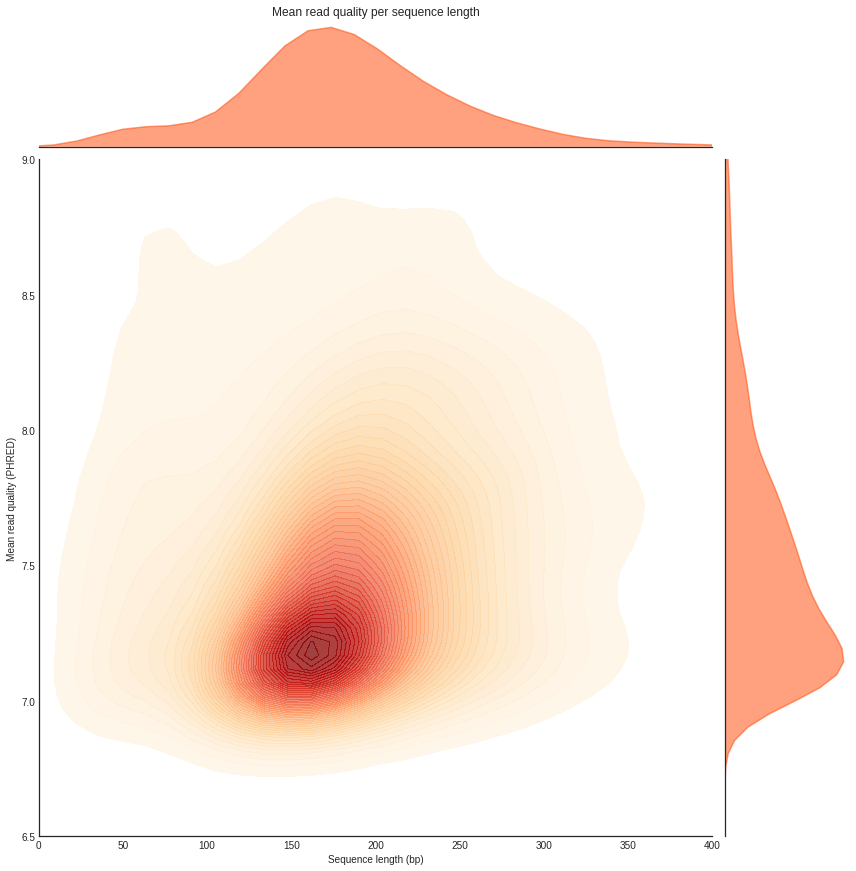

In [13]:
p = pycoQC(example_file_1D_RNA_2, filter_zero_len=True, filter_fail=True, filter_calibration=True)

g = p.reads_len_quality(
    figsize=10,
    kde=True,
    kde_cmap='OrRd',
    kde_alpha=0.75,
    kde_levels=25,
    kde_shade=True,
    scatter=False,
    sample=50000,
    max_len=400,
    min_len=0,
    max_qual=9,
    min_qual=6.5)

# Dev 

In [35]:
import pandas as pd
from pycl.pycl import head, tail, cat

In [34]:
head ("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt")

In [17]:
df = pd.read_csv("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", sep ="\t")
pp (df.columns)
display(df.head())

Index(['filename', 'read_id', 'run_id', 'channel', 'start_time', 'duration',
       'num_events', 'passes_filtering', 'template_start',
       'num_events_template', 'template_duration', 'num_called_template',
       'sequence_length_template', 'mean_qscore_template',
       'strand_score_template', 'calibration_strand_genome_template',
       'calibration_strand_identity_template',
       'calibration_strand_accuracy_template', 'aligned_speed_bps_template'],
      dtype='object')


filename  \
0  dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_254_ch_451_strand.fast5   
1   dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_37_ch_171_strand.fast5   
2  dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_139_ch_122_strand.fast5   
3  dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_169_ch_411_strand.fast5   
4  dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_mux_scan_modRNA_r001_68137_read_131_ch_487_strand.fast5   

                                read_id  \
0  e6c18a6b-c15e-4f98-9736-a1a1f4d5f1d8   
1  9c224408-e940-4bb2-9d0b-7cc9fe8d8a3c   
2  3bcd008e-40d0-45a9-b9fc-69200a45248a   
3  f62e00be-bf3c-49a2-9cf0-f9d22b5f89a6   
4  af0cdd89-85b2-447d-b3b2-0bbd12a30f79   

                                     run_id  channel  start_time  duration  \
0  3a0ea63a73db0f9fb611b9da3a37045d249a9be0      451   277.12375   3.81550   
1  3a0ea63a73db0f9fb611b9da3a37045d249a9be0      171    59.09725   4.87125   
2  3a0ea63a73db0f9fb611b9da3a37045d249a9be0      122   208.28675   6.53700   
3  3a0ea63a73db0f9fb611b9da3a37045d249a9be0      411   186.14375   3.52700   
4  3a0ea63a73db0f9fb611b9da3a37045d249a9be0      487   157.32875   5.27700   

   num_events  passes_filtering  template_start  num_events_template  \
0        1017             False          0.0000                 1017   
1        1299             False          0.0000                 1299   
2        1743             False          0.0000                 1743   
3           0             False          0.0000                    0   
4        1282             False          0.4695                 1282   

   template_duration  num_called_template  sequence_length_template  \
0            3.81550                 1017                        35   
1            4.87125                 1299                       146   
2            6.53700                 1743                       117   
3            0.00000                    0                         0   
4            4.80750                 1282                       114   

   mean_qscore_template  strand_score_template  \
0                 5.014                -0.0034   
1                 5.845                -0.0026   
2                 6.047                -0.0019   
3                 0.000                 0.0000   
4                 5.410                -0.0031   

  calibration_strand_genome_template  calibration_strand_identity_template  \
0                       filtered_out                                  -1.0   
1                       filtered_out                                  -1.0   
2                       filtered_out                                  -1.0   
3                           no_match                                  -1.0   
4                       filtered_out                                  -1.0   

   calibration_strand_accuracy_template  aligned_speed_bps_template  
0                                  -1.0                         0.0  
1                                  -1.0                         0.0  
2                                  -1.0                         0.0  
3                                  -1.0                         0.0  
4                                  -1.0                         0.0

In [25]:
df["calibration_strand_genome_template"].value_counts()

filtered_out    39962
no_match         9910
YHR174W           128
Name: calibration_strand_genome_template, dtype: int64

In [28]:
df[(df["calibration_strand_genome_template"] == "YHR174W")]

filename  \
1066      dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2025_ch_91_strand.fast5   
1128      dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_3628_ch_80_strand.fast5   
1535     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_3297_ch_485_strand.fast5   
1713     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_7639_ch_440_strand.fast5   
1822     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2868_ch_394_strand.fast5   
1861     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2543_ch_360_strand.fast5   
1915     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_6652_ch_430_strand.fast5   
2167     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_4928_ch_445_strand.fast5   
2253     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2342_ch_197_strand.fast5   
2367     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_1964_ch_157_strand.fast5   
3153     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_5830_ch_204_strand.fast5   
3191      dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_633_ch_369_strand.fast5   
4078      dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_4630_ch_72_strand.fast5   
5050     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_3788_ch_296_strand.fast5   
5358     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_5564_ch_483_strand.fast5   
5554     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_3419_ch_389_strand.fast5   
6439     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_6885_ch_191_strand.fast5   
6783     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_3680_ch_250_strand.fast5   
7379     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_2469_ch_446_strand.fast5   
7479     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_1443_ch_291_strand.fast5   
8086      dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_163_ch_199_strand.fast5   
8149     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_3098_ch_207_strand.fast5   
8398      dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_1787_ch_52_strand.fast5   
8773       dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_807_ch_87_strand.fast5   
9643     dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170613_FNFAH04839_MN21747_sequencing_run_modRNA_r001_33982_read_1325_ch_337_strand.fast5   
...                                   

In [18]:
df = pd.read_csv("./data/sequencing_summary_1D_DNA_Albacore_1.2.1.txt", sep ="\t")
pp (df.columns)
display(df.head())

Index(['filename', 'read_id', 'run_id', 'channel', 'start_time', 'duration',
       'num_events', 'template_start', 'num_events_template',
       'template_duration', 'num_called_template', 'sequence_length_template',
       'mean_qscore_template', 'strand_score_template'],
      dtype='object')


filename  \
0   Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch25_read25655_strand.fast5   
1     Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch464_read94_strand.fast5   
2    Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch58_read1933_strand.fast5   
3     Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch4_read3422_strand.fast5   
4  Dell_OptiPlex_7040_20170418_FNFAF04116_MN19173_sequencing_run_LambdaPhage2_56835_ch422_read12703_strand.fast5   

                                read_id  \
0  78ff81ca-a98a-42dd-a4d0-da3cdce4a58a   
1  e3e4c1b5-2c8b-45b8-9343-4556d168d3e4   
2  88ce546b-5a65-415f-a804-beac498bd345   
3  a201e03f-5e22-4bae-8a3e-c2aa4878a7b0   
4  1c27e49c-ad0f-4582-9969-fdffa86b2562   

                                     run_id  channel   start_time  duration  \
0  ad3de3b63de71c4c6d5ea4470a82782cf51210d9       25  43688.41225  32.28575   
1  ad3de3b63de71c4c6d5ea4470a82782cf51210d9      464    366.69175  10.66100   
2  ad3de3b63de71c4c6d5ea4470a82782cf51210d9       58  12908.85125   1.86050   
3  ad3de3b63de71c4c6d5ea4470a82782cf51210d9        4  36200.59750   4.74650   
4  ad3de3b63de71c4c6d5ea4470a82782cf51210d9      422  46239.24625  90.23425   

   num_events  template_start  num_events_template  template_duration  \
0       26147         0.01525                26147           32.27050   
1        8551         0.00000                 8551           10.66100   
2        1321         0.20650                 1321            1.65400   
3        3703         0.07050                 3703            4.67600   
4       72582         0.63950                72582           89.59475   

   num_called_template  sequence_length_template  mean_qscore_template  \
0                26147                     13680                 8.287   
1                 8551                      5244                11.404   
2                 1321                       840                12.401   
3                 3703                       705                 6.920   
4                72582                     39852                 8.558   

   strand_score_template  
0                -0.0012  
1                -0.0010  
2                -0.0008  
3                -0.0019  
4                -0.0013

In [2]:
df = pd.read_csv("./data/sequencing_summary_1D2_DNA_Albacore_1.2.1.txt", sep ="\t")
pp (df.columns)
display(df.head())

Index(['filename1', 'filename2', 'read_id1', 'read_id2', 'read_id', 'run_id',
       'channel', 'start_time', 'sequence_length_2d', 'mean_qscore_2d'],
      dtype='object')


filename1  \
0   Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_27_ch_1_strand.fast5   
1  Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_496_ch_1_strand.fast5   
2   Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_47_ch_1_strand.fast5   
3   Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_73_ch_1_strand.fast5   
4  Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_526_ch_1_strand.fast5   

                                                                                                             filename2  \
0   Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_29_ch_1_strand.fast5   
1  Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_498_ch_1_strand.fast5   
2   Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_49_ch_1_strand.fast5   
3   Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_75_ch_1_strand.fast5   
4  Jon_Sanders_MacBook_Pro_local_20170614_FNFAH05583_MN19697_sequencing_run_cyanoISB2_75887_read_530_ch_1_strand.fast5   

                               read_id1                              read_id2  \
0  e30e3338-c234-49d1-a5e5-e33edf92ac78  479b3fb3-463a-49e0-a4f0-553fcfc89367   
1  1b6bac9c-43ea-4a03-bf30-6d2388d92c53  f7d734b9-4651-4243-b25f-480cad4e9ee9   
2  2c996caf-1883-4293-a82a-41fddeca9aac  9de9f7d8-e4a6-4367-9aa5-eaa749d3c104   
3  08944a86-a32a-48f4-bcaa-b96777a7224a  485e9580-c1fa-4225-9907-1106cb261c86   
4  83349be4-2b55-48fa-bac5-223c895d17c4  fef07c9b-027f-4108-a2e0-07752551b4cc   

                                                                    read_id  \
0  e30e3338-c234-49d1-a5e5-e33edf92ac78479b3fb3-463a-49e0-a4f0-553fcfc89367   
1  1b6bac9c-43ea-4a03-bf30-6d2388d92c53f7d734b9-4651-4243-b25f-480cad4e9ee9   
2  2c996caf-1883-4293-a82a-41fddeca9aac9de9f7d8-e4a6-4367-9aa5-eaa749d3c104   
3  08944a86-a32a-48f4-bcaa-b96777a7224a485e9580-c1fa-4225-9907-1106cb261c86   
4  83349be4-2b55-48fa-bac5-223c895d17c4fef07c9b-027f-4108-a2e0-07752551b4cc   

                                     run_id  channel  start_time  \
0  5a13ea2bfbe679a8b1ede87e43dc1644159dfd39        1    26.42497   
1  5a13ea2bfbe679a8b1ede87e43dc1644159dfd39        1  1006.83051   
2  5a13ea2bfbe679a8b1ede87e43dc1644159dfd39        1    50.37915   
3  5a13ea2bfbe679a8b1ede87e43dc1644159dfd39        1    77.39226   
4  5a13ea2bfbe679a8b1ede87e43dc1644159dfd39        1  1054.26096   

   sequence_length_2d  mean_qscore_2d  
0                 865          16.685  
1                 341          12.247  
2                 559          12.664  
3                 593          12.817  
4                 425          13.169

In [16]:
"sequence_length_2d" in df

True

In [38]:
df = pd.read_csv("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", sep ="\t")
df["run_id"].unique()

d = df["run_id"].value_counts().to_frame()
d.columns = ["read count"]
d.index.name = "run ID"
d

read count
run ID                                              
2f4d52a34ec56518aa0d051dc4484c2b454abc6a       20726
f6d788dc15a52f5bbb736aa82c5dee7b9c50d63f       12141
aa23fdac499ddcbe80b86a240ee2e803f39d62ea        8790
135e6b0c7d4223d4047216f10bede4ca5a84eb28        5739
a175388e5c1ed0e6a78791f120de1c9efcb46b43         986
3a0ea63a73db0f9fb611b9da3a37045d249a9be0         626
e7d9b3c6bb26250ffaf1f8be9d2d1ae0105204b9         316
7e95428dd57055c0665696cce1bffc73fd5b5d29         260
b4013533403ec7bbe89d2e9e4021d06c69fe6cf5         232
5db3f3d44b7ce2c468a7d786060fe39e59282240         184

In [51]:
df = pd.read_csv("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt", sep ="\t")
runid_list = df["run_id"].unique()
df = 

increment_time = 0

for runid in runid_list:
    
    print ("\tProcessing reads with Run_ID {}".format(runid))
    
    max_val = df['start_time'][df["run_id"] == runid].max()
    
    df.loc[df["run_id"] == runid, 'start_time'] += increment_time
    
    increment_time += max_val+1
    
df.sort_values("start_time", inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index("read_id", inplace=True)

In [41]:
from collections import OrderedDict
d = OrderedDict()
with open ("./data/sequencing_summary_1D_RNA_Albacore_2.0.1.txt") as fp:
    for l in fp:
        run_id = l.split()[2]
        if run_id not in d:
            d[run_id] = 0
        d[run_id] +=1
d

OrderedDict([('run_id', 1),
             ('3a0ea63a73db0f9fb611b9da3a37045d249a9be0', 626),
             ('2f4d52a34ec56518aa0d051dc4484c2b454abc6a', 20726),
             ('e7d9b3c6bb26250ffaf1f8be9d2d1ae0105204b9', 316),
             ('f6d788dc15a52f5bbb736aa82c5dee7b9c50d63f', 12141),
             ('5db3f3d44b7ce2c468a7d786060fe39e59282240', 184),
             ('a175388e5c1ed0e6a78791f120de1c9efcb46b43', 986),
             ('b4013533403ec7bbe89d2e9e4021d06c69fe6cf5', 232),
             ('135e6b0c7d4223d4047216f10bede4ca5a84eb28', 5739),
             ('7e95428dd57055c0665696cce1bffc73fd5b5d29', 260),
             ('aa23fdac499ddcbe80b86a240ee2e803f39d62ea', 8790)])

In [31]:
grouped_df = df.groupby("run_id", sort=False)

In [42]:
grouped_df.get_group("135e6b0c7d4223d4047216f10bed4ca5a84eb28")

KeyError: '135e6b0c7d4223d4047216f10bed4ca5a84eb28'